<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Gestión de Outliers

AutoRenew, la empresa líder en la venta de coches de segunda mano, sigue adelante con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Este modelo es clave para mejorar las estrategias de ventas, marketing y optimización del inventario de la empresa. Ya has realizado un análisis exploratorio inicial y gestionado los valores nulos en el conjunto de datos. Ahora, es el momento de abordar otro aspecto crucial del preprocesamiento: la **gestión de outliers**.

En este laboratorio, te enfocarás en identificar y gestionar los outliers (valores atípicos) presentes en el conjunto de datos. Los outliers pueden distorsionar los resultados de un análisis y afectar negativamente el rendimiento de los modelos predictivos, por lo que es fundamental tratarlos adecuadamente antes de proceder con las siguientes fases del proyecto.


**Instrucciones:**

1. **Identificación de Outliers:** Explora las columnas clave del conjunto de datos (como `price`, `powerCV`, `kilometer`, etc.) para identificar posibles outliers. Utiliza gráficos como diagramas de caja (boxplots) y análisis estadísticos para detectar valores que se desvíen significativamente del resto de los datos.

2. **Análisis de Outliers:** Una vez identificados, analiza los outliers para determinar si son errores de datos, valores extremos válidos o resultados de condiciones específicas que deben ser tenidos en cuenta. Considera el contexto de cada columna al evaluar la relevancia de estos valores atípicos.

3. **Gestión de Outliers:** Decide la estrategia más adecuada para manejar los outliers. Esto podría incluir la eliminación de los outliers, la transformación de los datos, o la aplicación de técnicas de imputación. Justifica tu elección basándote en cómo los outliers podrían afectar el modelo predictivo.

**Nota:** Recuerda que este laboratorio es parte de una serie de actividades en las que utilizarás el mismo conjunto de datos a lo largo de la semana. Documenta cuidadosamente los pasos que sigas para que puedas referirte a ellos en las próximas etapas del proyecto.


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product, combinations

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

from src import soporte_preprocesamiento as sp

In [25]:
df = pd.read_csv("datos/df_estandarizado.csv", index_col=0)

In [26]:
df["monthOfRegistration"] = df["monthOfRegistration"].astype(object)

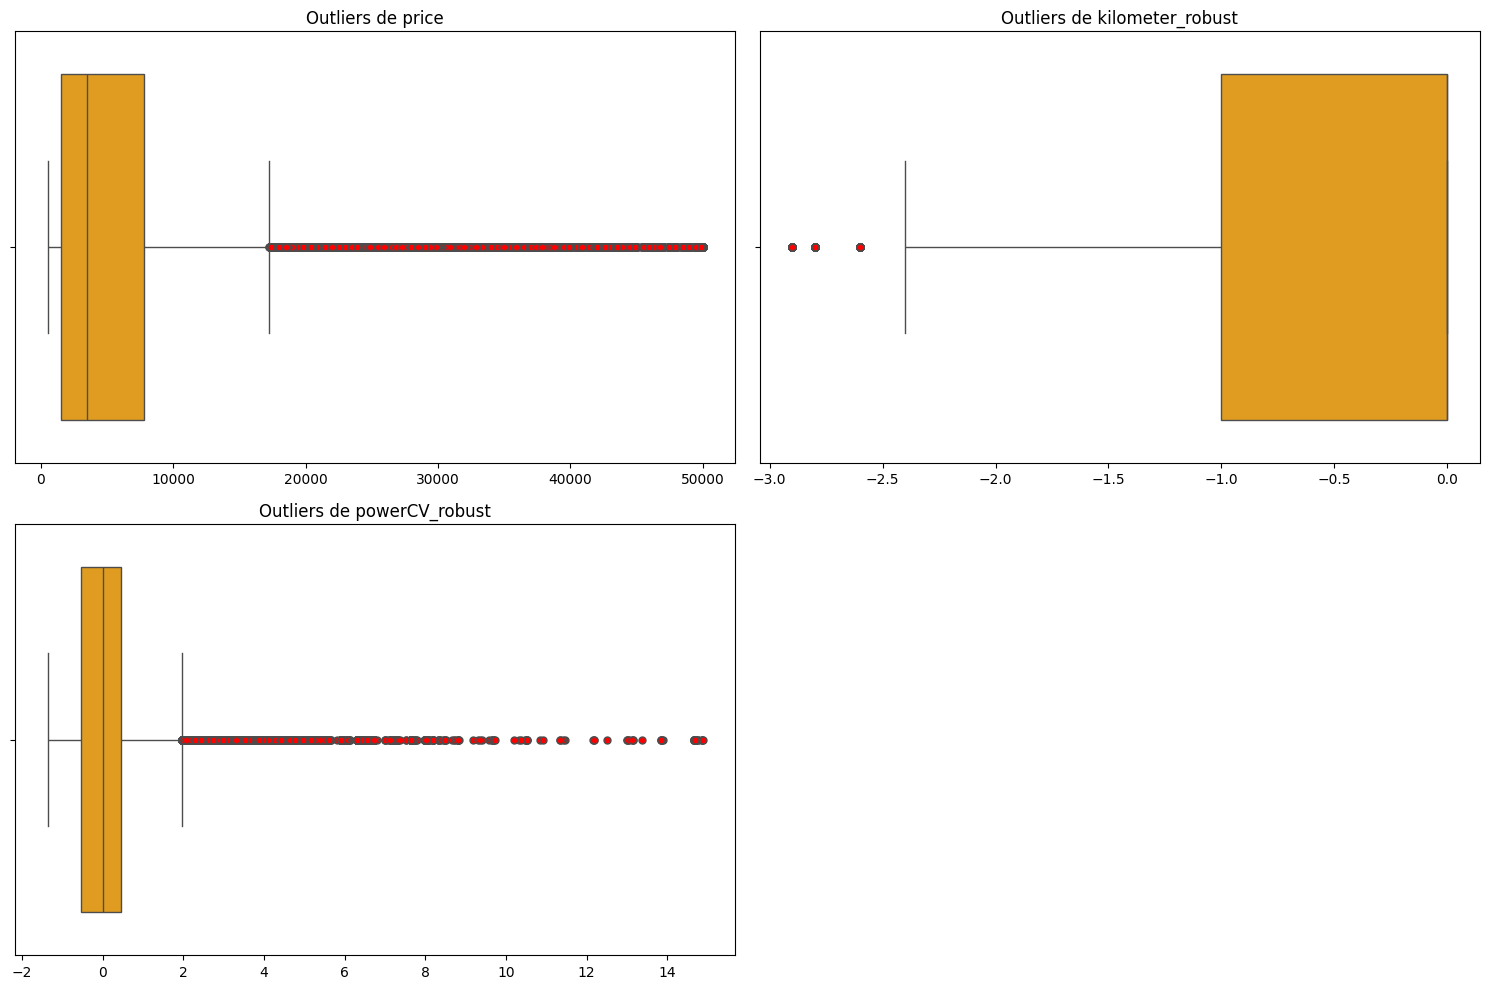

In [4]:
sp.detectar_outliers(df)

Para gestionar los nulos, usaremos el Local Outlier Factor, debido a que tenemos datos muy similares y muy variados.

In [27]:
col_numericas=['powerCV_robust', 'kilometer_robust']
lista_vecinos=[5, 20, 50]
list_contaminacion = [0.01, 0.05, 0.1]

df_lof = df.copy()
df_lof = sp.gestion_nulos_lof(df_lof, col_numericas, lista_vecinos, list_contaminacion)

combinaciones_variables = list(combinations(['powerCV_robust', 'kilometer_robust', 'price'], 2))
columnas_hue = df_lof.filter(like="outlier").columns



100%|██████████| 9/9 [00:57<00:00,  6.41s/it]


In [ ]:
for col_hue in tqdm(columnas_hue):
    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
    axes = axes.flat

    for indice, tupla in enumerate(combinaciones_variables):
        sns.scatterplot(df_lof, x=tupla[0], y=tupla[1], ax=axes[indice], hue = col_hue, palette="Set1", style=col_hue, alpha=0.2)
        plt.suptitle(f"{col_hue}")
        plt.tight_layout()

In [28]:
df_lof

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,model,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,kilometer_robust,powerCV_robust,outliers_lof_5_0.01,outliers_lof_5_0.05,outliers_lof_5_0.1,outliers_lof_20_0.01,outliers_lof_20_0.05,outliers_lof_20_0.1,outliers_lof_50_0.01,outliers_lof_50_0.05,outliers_lof_50_0.1
0,2016-03,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,Moderno,manually,Sin informacion,5.0,diesel,audi,yes,2016-03,2016-04,-0.5,1.125346,1,1,1,1,1,1,1,1,1
1,2016-03,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,Moderno,automatic,grand,8.0,diesel,jeep,Sin informacion,2016-03,2016-04,-0.5,0.684668,1,1,1,1,1,1,1,1,1
2,2016-03,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,Moderno,manually,golf,6.0,petrol,volkswagen,no,2016-03,2016-03,0.0,-0.789908,1,1,1,1,1,1,1,1,1
3,2016-03,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,Moderno,manually,fabia,7.0,diesel,skoda,no,2016-03,2016-04,-1.2,-0.891603,1,1,1,1,1,1,1,1,1
4,2016-04,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,private,offer,650.0,test,Sin informacion,Clásico,manually,3er,10.0,petrol,bmw,yes,2016-04,2016-04,0.0,-0.332281,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330611,2016-03,Suche_t4___vito_ab_6_sitze,private,offer,2200.0,test,Sin informacion,Moderno,Sin informacion,Sin informacion,1.0,Sin informacion,sonstige_autos,Sin informacion,2016-03,2016-04,-2.6,0.152152,1,1,1,1,1,1,1,1,1
330612,2016-03,Smart_smart_leistungssteigerung_100ps,private,offer,1199.0,test,convertible,Moderno,automatic,fortwo,3.0,petrol,smart,no,2016-03,2016-03,-0.5,-0.349230,1,1,1,1,1,1,1,1,1
330613,2016-03,Volkswagen_Multivan_T4_TDI_7DC_UY2,private,offer,9200.0,test,bus,Clásico,manually,transporter,3.0,diesel,volkswagen,no,2016-03,2016-04,0.0,-0.332281,1,1,1,1,1,1,1,1,1
330614,2016-03,VW_Golf_Kombi_1_9l_TDI,private,offer,3400.0,test,combi,Moderno,manually,golf,6.0,diesel,volkswagen,Sin informacion,2016-03,2016-03,0.0,-0.366179,1,1,1,1,1,1,1,1,1


Consideraremos outliers aquellas filas que contengan más de 60% de nulos, en este caso, si tenemos 9 columnas de outliers, que serían 5/9.

In [29]:
cantidad = 6
df_filtrado = df_lof[(df_lof == -1).sum(axis=1) > cantidad]

In [30]:
df_filtrado

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,model,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,kilometer_robust,powerCV_robust,outliers_lof_5_0.01,outliers_lof_5_0.05,outliers_lof_5_0.1,outliers_lof_20_0.01,outliers_lof_20_0.05,outliers_lof_20_0.1,outliers_lof_50_0.01,outliers_lof_50_0.05,outliers_lof_50_0.1
88,2016-03,Hyundai_Genesis_Coupe_GT_3.8_V6_Automatik,private,offer,22999.0,control,coupe,Moderno,automatic,andere,4.0,petrol,hyundai,no,2016-03,2016-04,-2.0,3.023652,-1,-1,-1,1,-1,-1,1,-1,-1
135,2016-03,Kia_Sorento__coole_Farbe_schaut......,private,offer,7500.0,test,suv,Moderno,automatic,sorento,11.0,petrol,kia,Sin informacion,2016-03,2016-04,-2.9,1.193143,-1,-1,-1,1,-1,-1,1,-1,-1
241,2016-03,Renault_Clio_III_Sport_RS_201,private,offer,8400.0,control,small car,Moderno,manually,clio,6.0,petrol,renault,no,2016-03,2016-03,-1.6,1.311787,-1,-1,-1,-1,-1,-1,-1,-1,-1
255,2016-03,Ford_Mustang,private,offer,18700.0,test,coupe,Moderno,automatic,mustang,8.0,petrol,ford,no,2016-03,2016-04,-1.4,1.515177,-1,-1,-1,-1,-1,-1,-1,-1,-1
459,2016-03,Ford_Fiesta,private,offer,6500.0,control,small car,Moderno,manually,fiesta,6.0,petrol,ford,no,2016-03,2016-03,-2.2,-0.688213,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330039,2016-03,Nissan_350Z_Roadster_Premium_Pack,private,offer,12000.0,control,Sin informacion,Reciente,manually,andere,6.0,Sin informacion,nissan,no,2016-03,2016-04,0.0,2.989753,-1,-1,-1,-1,-1,-1,-1,-1,-1
330147,2016-03,Audi_TT_RS_plus_Coupe_S_tronic,private,offer,39900.0,control,coupe,Moderno,automatic,tt,3.0,petrol,audi,no,2016-03,2016-03,-2.4,3.972804,-1,-1,-1,1,-1,-1,1,-1,-1
330321,2016-03,Mercedes_Benz_CLS_55_AMG_Automatik,private,offer,20000.0,control,coupe,Moderno,automatic,andere,7.0,petrol,mercedes_benz,no,2016-03,2016-03,-0.5,5.905007,-1,-1,-1,1,-1,-1,1,-1,-1
330477,2016-04,Mazda_CX_5_SKYACTIV_D_175_Drive_AWD_Sports_Line,private,offer,32900.0,test,suv,Reciente,automatic,cx_reihe,9.0,diesel,mazda,no,2016-04,2016-04,-2.8,0.888058,-1,-1,-1,1,-1,-1,1,-1,-1


In [31]:
df_lof.describe()

,price,kilometer_robust,powerCV_robust,outliers_lof_5_0.01,outliers_lof_5_0.05,outliers_lof_5_0.1,outliers_lof_20_0.01,outliers_lof_20_0.05,outliers_lof_20_0.1,outliers_lof_50_0.01,outliers_lof_50_0.05,outliers_lof_50_0.1
count,330616.000000,330616.000000,330616.000000,330616.000000,330616.000000,330616.000000,330616.000000,330616.000000,330616.000000,330616.000000,330616.000000,330616.000000
mean,5972.944507,-0.488608,0.097080,0.983842,0.983842,0.983842,0.980201,0.944389,0.944389,0.980031,0.900120,0.889993
std,6770.233746,0.786917,0.967077,0.179038,0.179038,0.179038,0.198007,0.328832,0.328832,0.198844,0.435643,0.455974
min,500.000000,-2.900000,-1.366179,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1500.000000,-1.000000,-0.535670,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3499.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,7800.000000,0.000000,0.464330,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,50000.000000,0.000000,14.871109,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
3561/df.shape[0]*100

1.0770803590872795

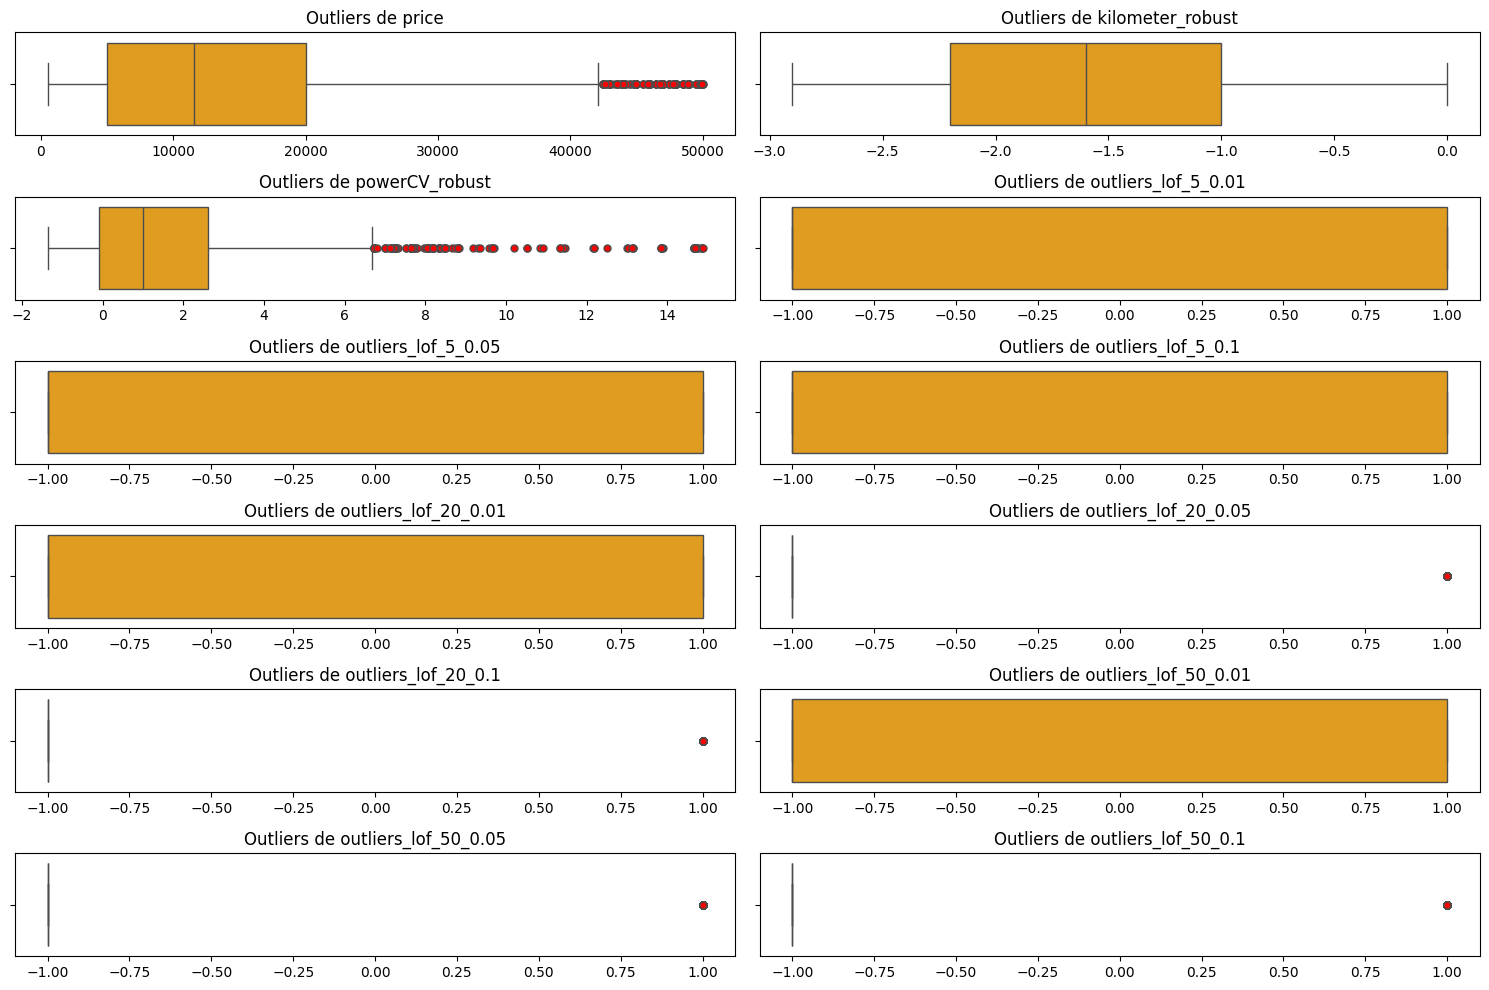

In [11]:
sp.detectar_outliers(df_filtrado)

In [33]:
df_filtrado.describe()

,price,kilometer_robust,powerCV_robust,outliers_lof_5_0.01,outliers_lof_5_0.05,outliers_lof_5_0.1,outliers_lof_20_0.01,outliers_lof_20_0.05,outliers_lof_20_0.1,outliers_lof_50_0.01,outliers_lof_50_0.05,outliers_lof_50_0.1
count,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.00000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000
mean,14968.141486,-1.597496,1.841512,-0.902337,-0.902337,-0.902337,-0.25626,-0.999165,-0.999165,0.085977,-0.937396,-0.994992
std,12062.186934,0.847678,2.560621,0.431121,0.431121,0.431121,0.96681,0.040859,0.040859,0.996505,0.348339,0.099979
min,500.000000,-2.900000,-1.366179,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,5200.000000,-2.200000,0.087211,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,12000.000000,-1.600000,1.345685,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000
75%,21662.500000,-1.000000,2.998228,-1.000000,-1.000000,-1.000000,1.00000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000
max,50000.000000,0.000000,14.854160,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='kilometer_robust', ylabel='price'>

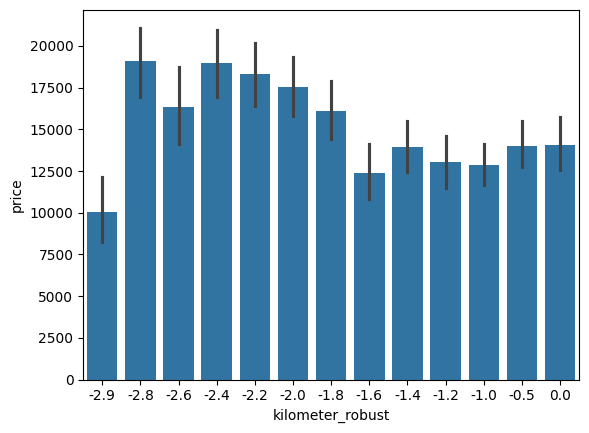

In [34]:
sns.barplot(df_filtrado, x="kilometer_robust", y="price")

- Tenemos aproximadamente 3500 outliers, dado que no tenemos información sobre si se encuentran en la columna de kilometer o powerCV, reemplazaremos por la mediana en cada uno de los casos, dado que reducimos el impacto de eliminar datos, y evitamos la sensibilidad de la media a los valores extremos. No tenemos evidencias para eliminar los datos, y siendo la distribución no normal, sustituiremos con este método.

In [35]:
df_lof.loc[df_filtrado.index, "kilometer_robust"] = 1.6

In [36]:
df_lof.loc[df_filtrado.index, 'powerCV_robust'] = 1.040601

In [37]:
df_lof.describe().T

,count,mean,std,min,25%,50%,75%,max
price,330616.0,5972.944507,6770.233746,500.000000,1500.00000,3499.0,7800.00000,50000.000000
kilometer_robust,330616.0,-0.465435,0.797620,-2.900000,-0.50000,0.0,0.00000,1.600000
powerCV_robust,330616.0,0.091276,0.933866,-1.366179,-0.53567,0.0,0.46433,14.871109
outliers_lof_5_0.01,330616.0,0.983842,0.179038,-1.000000,1.00000,1.0,1.00000,1.000000
outliers_lof_5_0.05,330616.0,0.983842,0.179038,-1.000000,1.00000,1.0,1.00000,1.000000
outliers_lof_5_0.1,330616.0,0.983842,0.179038,-1.000000,1.00000,1.0,1.00000,1.000000
outliers_lof_20_0.01,330616.0,0.980201,0.198007,-1.000000,1.00000,1.0,1.00000,1.000000
outliers_lof_20_0.05,330616.0,0.944389,0.328832,-1.000000,1.00000,1.0,1.00000,1.000000
outliers_lof_20_0.1,330616.0,0.944389,0.328832,-1.000000,1.00000,1.0,1.00000,1.000000
outliers_lof_50_0.01,330616.0,0.980031,0.198844,-1.000000,1.00000,1.0,1.00000,1.000000


In [38]:
df_lof = df_lof[['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'model',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'lastSeen', 'kilometer_robust', 'powerCV_robust']]

In [39]:
df_lof.to_csv("datos/outliersNum.csv")

In [19]:
sp.plot_numericas(df)

ValueError: 
$$$***SUZUKI_ALTO_1_1_GXI_1_Jahr_Tuev***$$$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

Error in callback <function _draw_all_if_interactive at 0x10f096b80> (for post_execute), with arguments args (),kwargs {}:


ValueError: 
$$$***SUZUKI_ALTO_1_1_GXI_1_Jahr_Tuev***$$$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

ValueError: 
$$$***SUZUKI_ALTO_1_1_GXI_1_Jahr_Tuev***$$$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 1500x1000 with 18 Axes>